# Makemore 1: bigrams

Note: Cours du 20/12/2024. Édition post-cours avec réseau de neurone fonctionnel à la fin.

https://github.com/karpathy/makemore

## Jeu de données: les mots du code civil

In [1]:
words = open('civil_mots.txt', 'r').read().splitlines()

In [2]:
len(words)
# Devrait afficher 7223

7223

In [3]:
words[40:50]

['acceptée',
 'acceptées',
 'accessible',
 'accession',
 'accessoire',
 'accessoirement',
 'accessoires',
 'accident',
 'accidents',
 'accoler']

## Calcul des bigrams pour les caractères de ces mots

In [412]:
# Caractère spécial indiquant le début ou la fin d'un mot
EOS='.'

In [413]:
# Exemple de calcul des bigrams sur un mot
b = {}
for w in ['accessoire']:
    chs = [EOS] + list(w) + [EOS]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        print(bigram)
        b[bigram] = b.get(bigram, 0) + 1

('.', 'a')
('a', 'c')
('c', 'c')
('c', 'e')
('e', 's')
('s', 's')
('s', 'o')
('o', 'i')
('i', 'r')
('r', 'e')
('e', '.')


In [414]:
# Calcul sur tous les mots
b = {}
for w in words:
    chs = [EOS] + list(w) + [EOS]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [415]:
print("NB bigrams =", len(b))
sorted(b.items(), key = lambda kv: -kv[1])[:20]

NB bigrams = 554


[(('s', '.'), 1974),
 (('e', '.'), 1872),
 (('n', 't'), 1587),
 (('e', 'n'), 1427),
 (('o', 'n'), 1312),
 (('e', 's'), 1227),
 (('r', 'e'), 1200),
 (('t', '.'), 1187),
 (('t', 'i'), 1055),
 (('e', 'r'), 934),
 (('.', 'c'), 871),
 (('t', 'e'), 805),
 (('.', 'p'), 760),
 (('c', 'o'), 753),
 (('.', 'a'), 744),
 (('a', 'n'), 689),
 (('i', 't'), 669),
 (('i', 's'), 665),
 (('i', 'n'), 665),
 (('.', 'r'), 653)]

In [416]:
chars = sorted(list(set(''.join(words))))
print(chars)
nb_chars = len(chars) + 1  # On ajoute 1 pour EOS
print("NB caractères =", nb_chars)
# Fun fact: il n'y a pas de 'k' dans le code civil

["'", '-', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ô', 'ù', 'û', 'œ']
NB caractères = 41


In [417]:
# Dictionnaire permettant de passer d'un caractère à son identifiant entier
ctoi = {c:i+1 for i,c in enumerate(chars)}
ctoi['.'] = 0
print("CTOI =", ctoi)
# Dictionnaire permettant permettant de passer d'un entier à son caractère
itoc = {i:s for s,i in ctoi.items()}
print("ITOC =", itoc)

CTOI = {"'": 1, '-': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'j': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, 'à': 28, 'â': 29, 'ç': 30, 'è': 31, 'é': 32, 'ê': 33, 'ë': 34, 'î': 35, 'ï': 36, 'ô': 37, 'ù': 38, 'û': 39, 'œ': 40, '.': 0}
ITOC = {1: "'", 2: '-', 3: 'a', 4: 'b', 5: 'c', 6: 'd', 7: 'e', 8: 'f', 9: 'g', 10: 'h', 11: 'i', 12: 'j', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 28: 'à', 29: 'â', 30: 'ç', 31: 'è', 32: 'é', 33: 'ê', 34: 'ë', 35: 'î', 36: 'ï', 37: 'ô', 38: 'ù', 39: 'û', 40: 'œ', 0: '.'}


## Matrice (tenseur d'ordre 2) pour stocker les bigrams

In [418]:
import torch

# Construction d'une matrice 
N = torch.zeros((nb_chars, nb_chars), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        N[ix1, ix2] += 1
print(N.shape)
print(N)

torch.Size([41, 41])
tensor([[0, 0, 0,  ..., 0, 0, 2],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)


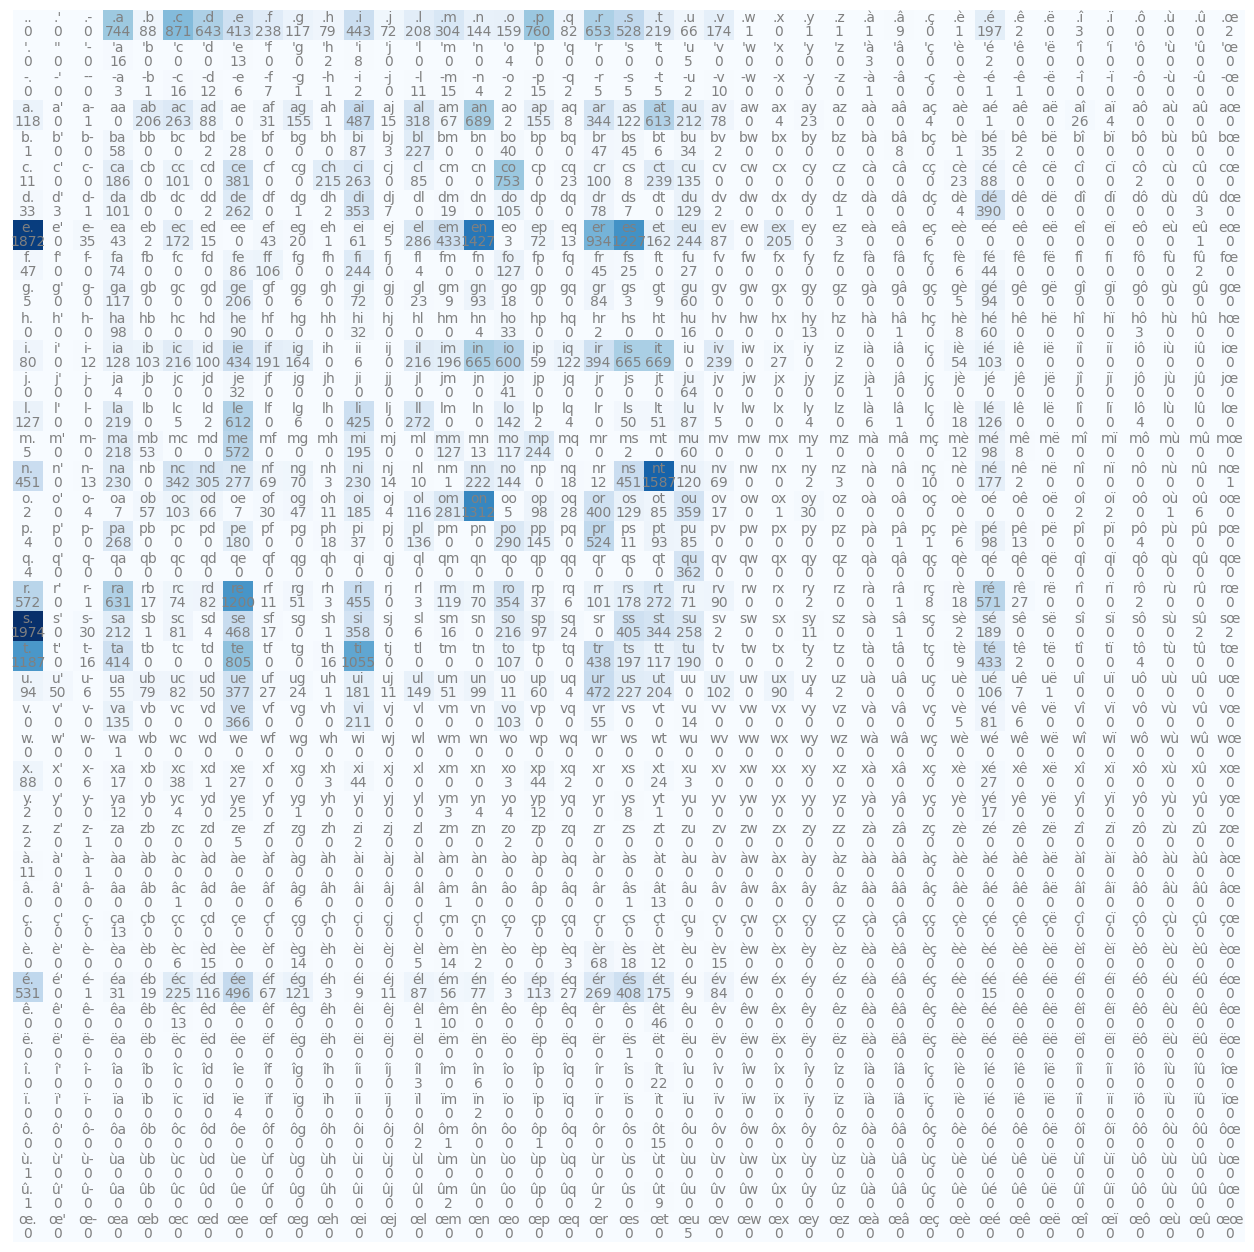

In [419]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(nb_chars):
    for j in range(nb_chars):
        chstr = itoc[i] + itoc[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [420]:
# Première ligne, comptages pour les premières lettres des mots
N[0]
# La lettre 'c' est la plus courante en début de mot

tensor([  0,   0,   0, 744,  88, 871, 643, 413, 238, 117,  79, 443,  72, 208,
        304, 144, 159, 760,  82, 653, 528, 219,  66, 174,   1,   0,   1,   1,
          1,   9,   0,   1, 197,   2,   0,   3,   0,   0,   0,   0,   2],
       dtype=torch.int32)

On va transformer ces comptages en distribution de probabilité `p` pour la première ligne `N[0]`, en transformant d'abord chaque élément en `float` puis en normalisant par la somme des éléments.

In [421]:
# On va transformer ces comptages en distribution de probabilité, en transformant en float
# chaque élément
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0000, 0.0000, 0.1030, 0.0122, 0.1206, 0.0890, 0.0572, 0.0330,
        0.0162, 0.0109, 0.0613, 0.0100, 0.0288, 0.0421, 0.0199, 0.0220, 0.1052,
        0.0114, 0.0904, 0.0731, 0.0303, 0.0091, 0.0241, 0.0001, 0.0000, 0.0001,
        0.0001, 0.0001, 0.0012, 0.0000, 0.0001, 0.0273, 0.0003, 0.0000, 0.0004,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0003])

In [422]:
# On peut le faire sur toute la matrice, ligne par ligne, pour obtenir
# une matrice de probabilités
P = N.float()
P /= P.sum(1, keepdims=True)
P

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         2.7689e-04],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [7.1429e-02, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [423]:
P.shape

torch.Size([41, 41])

In [424]:
# On va échantilloner pour obtenir un 
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix, '->', itoc[ix])
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix, '->', itoc[ix])

32 -> é
3 -> a


In [429]:
# 15 tirages aléatoires
torch.multinomial(p, num_samples=15, replacement=True, generator=g)

tensor([12, 20,  3,  6, 17, 11, 17,  7,  5, 20,  4,  6, 13,  6, 19])

## Synthèse

In [430]:
#
# Générateur des mots selon notre modèle de langue génératif bigrams par comptage
#
import torch

# Lecture des données
EOS='.'
words = open('civil_mots.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))
nb_chars = len(chars) + 1  # On ajoute 1 pour EOS

# Dictionnaires caractère <-> entier
ctoi = {s:i+1 for i,s in enumerate(chars)}
ctoi['.'] = 0
itoc = {i:s for s,i in ctoi.items()}

# Construction d'une matrice contenant le comptage des bigrams
N = torch.zeros((nb_chars, nb_chars), dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        N[ix1, ix2] += 1

# Matrice de probabilité
P = N.float()
P /= P.sum(1, keepdims=True)

# Générateur aléatoire
g = torch.Generator().manual_seed(2147483647)

def generate_words(num, P, g):
    # Génération de 5 mots
    for i in range(num):
        out = []
        ix = 0
        while True:
            p = P[ix]
            ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
            out.append(itoc[ix])
            if ix == 0:
                  break
        print(''.join(out))

generate_words(5, P, g)

éssanée.
mexcororér.
monts.
ex.
moût.


## Fonction de perte: moyenne négative de du log de l'espérance

In [431]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

In [432]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["espérance"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-158565.9375)
nll=tensor(158565.9375)
2.3438470363616943


Ce "loss" à 2.34 est donc la mesure de qualité de notre modèle bigram par comptage.

Notre modèle se comporte de manière stricte lorsqu'il rencontre une combinaison de caractères qu'il ne connaît pas. Par exemple, si on cherche le score d'un mot comme "espérancejq", où la combinaison "jq" a une probabilité 0:

In [436]:
log_likelihood = 0.0
n = 0

for w in ["espérancejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.e: 0.0570 -2.8648
es: 0.1657 -1.7978
sp: 0.0206 -3.8835
pé: 0.0506 -2.9830
ér: 0.0902 -2.4059
ra: 0.1247 -2.0818
an: 0.1693 -1.7762
nc: 0.0704 -2.6539
ce: 0.1439 -1.9384
ej: 0.0008 -7.1192
jq: 0.0055 -5.2095
q.: 0.0123 -4.3994
log_likelihood=tensor(-39.1135)
nll=tensor(39.1135)
3.2594597339630127


On a un loss qui est à l'infini car l'une de probabilité transformée en log passe à l'infini. Habituellement, on fait donc du "lissage" de modèles (smoothing), en ajoutant par exemple 1 à tous les comptage avant de calculer les probabilités (noter le `N+1` ci-dessous):

In [437]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [438]:
log_likelihood = 0.0
n = 0

for w in ["espérancejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.e: 0.0570 -2.8648
es: 0.1657 -1.7978
sp: 0.0206 -3.8835
pé: 0.0506 -2.9830
ér: 0.0902 -2.4059
ra: 0.1247 -2.0818
an: 0.1693 -1.7762
nc: 0.0704 -2.6539
ce: 0.1439 -1.9384
ej: 0.0008 -7.1192
jq: 0.0055 -5.2095
q.: 0.0123 -4.3994
log_likelihood=tensor(-39.1135)
nll=tensor(39.1135)
3.2594597339630127


## Approche par réseau de neurones reproduisant l'approche par comptage

### Représentation des mots avec des vecteurs "one-hot": exemple avec un seul mot

In [439]:
# Création d'un jeu d'entrainement de bigrams (x,y)
xs, ys = [], []

for w in [words[40]]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = ctoi[ch1]
    ix2 = ctoi[ch2]
    print(ch1, ch2, '->', ix1, ix2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(words[40])
tensor_dims = len(words[40]) + 1
print("tensor_dims =", tensor_dims)

. a -> 0 3
a c -> 3 5
c c -> 5 5
c e -> 5 7
e p -> 7 17
p t -> 17 21
t é -> 21 32
é e -> 32 7
e . -> 7 0
acceptée
tensor_dims = 9


In [440]:
xs

tensor([ 0,  3,  5,  5,  7, 17, 21, 32,  7])

In [441]:
ys

tensor([ 3,  5,  5,  7, 17, 21, 32,  7,  0])

In [442]:
# Représentation de chaque caractère par un vecteur one-hot
# seul une composante est à 1.0, correspondant à l'indice du numéro du caractère
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=nb_chars).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.,

In [443]:
# La première dimension est la dimension du tenseur exemple
xenc.shape

torch.Size([9, 41])

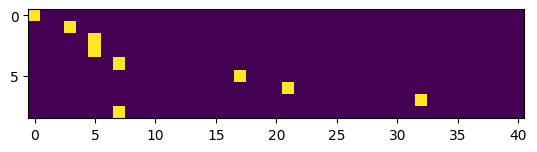

In [444]:
plt.imshow(xenc)

In [445]:
# Pour notre réseau, on va utiliser une matrice W des valeurs normales aléatoires comme
# point de départ
W = torch.randn((nb_chars, tensor_dims))  # Quand on aura tous les mots, on utilisera nb_chars x nb_chars
W

tensor([[ 7.3135e-01,  1.4324e+00, -1.7857e-01,  2.2835e+00, -1.0203e+00,
         -3.1607e-01,  1.4558e-01,  1.8370e-01,  2.9725e-01],
        [ 3.4628e-01,  1.4335e+00,  2.7875e-01, -6.6627e-01,  1.0436e+00,
          9.5633e-01, -1.4631e+00,  1.9904e+00,  9.9583e-01],
        [ 8.5507e-01, -2.5878e-01, -1.6071e+00, -3.3758e-01,  2.9874e+00,
         -1.3422e+00,  8.0043e-02,  1.2677e+00, -1.5005e+00],
        [ 1.0596e+00, -6.0115e-02,  9.1133e-01,  9.3140e-01, -9.7438e-01,
         -2.4899e-01, -9.5570e-01, -3.2773e-01, -7.8701e-01],
        [-7.6852e-01, -5.2068e-01, -1.3036e+00, -5.6183e-01,  1.1544e+00,
         -2.0663e-01, -1.8931e-01,  2.4077e-03, -7.1898e-01],
        [ 3.9581e-01,  1.6861e+00, -1.8578e-01,  5.0000e-01, -1.5030e+00,
         -6.1956e-01, -5.3982e-01,  6.4678e-01,  9.4536e-01],
        [-3.9981e-01,  6.4421e-02,  1.5232e-01, -5.3570e-01, -4.6112e-01,
         -7.9084e-01,  5.3910e-01, -1.2465e+00, -9.1238e-01],
        [-5.6349e-01,  3.5986e-01,  2.2851e-02, 

In [447]:
# En multipliant ces "poids" par nos vecteurs one-hot organisés en matrice...
# On obtient des valeurs que l'on va "interpréter" comme des logs (log-counts).
# En utilisant l'exponentielle de ces valeurs, on va retrouver quelque chose
# d'équivalent à la matrice N que nous avions défini précédemment dans la méthode
# par comptage.
xenc @ W

tensor([[ 7.3135e-01,  1.4324e+00, -1.7857e-01,  2.2835e+00, -1.0203e+00,
         -3.1607e-01,  1.4558e-01,  1.8370e-01,  2.9725e-01],
        [ 1.0596e+00, -6.0115e-02,  9.1133e-01,  9.3140e-01, -9.7438e-01,
         -2.4899e-01, -9.5570e-01, -3.2773e-01, -7.8701e-01],
        [ 3.9581e-01,  1.6861e+00, -1.8578e-01,  5.0000e-01, -1.5030e+00,
         -6.1956e-01, -5.3982e-01,  6.4678e-01,  9.4536e-01],
        [ 3.9581e-01,  1.6861e+00, -1.8578e-01,  5.0000e-01, -1.5030e+00,
         -6.1956e-01, -5.3982e-01,  6.4678e-01,  9.4536e-01],
        [-5.6349e-01,  3.5986e-01,  2.2851e-02, -8.7458e-01, -4.3384e-01,
          2.2541e+00,  4.4944e-01,  1.9138e+00,  2.9350e-01],
        [-5.9965e-01, -1.3613e+00,  5.7304e-01,  7.6893e-01,  1.6744e-01,
         -1.6828e-01, -9.6135e-01,  2.1519e-03, -2.0082e+00],
        [-2.2754e-01, -6.4901e-01,  4.9433e-01,  9.2372e-02,  1.7573e+00,
         -7.1461e-01, -1.9200e-01,  9.3336e-01,  4.1465e-01],
        [-1.4056e+00,  2.3300e-02,  3.8687e-01, 

In [448]:
logits = xenc @ W # log-counts 
counts = logits.exp() # statut équivalent à N
probs = counts / counts.sum(1, keepdims=True) # distribution de probabilités (equ. à p)
probs

tensor([[0.0957, 0.1930, 0.0385, 0.4519, 0.0166, 0.0336, 0.0533, 0.0554, 0.0620],
        [0.2494, 0.0814, 0.2150, 0.2194, 0.0326, 0.0674, 0.0332, 0.0623, 0.0393],
        [0.0978, 0.3554, 0.0547, 0.1085, 0.0146, 0.0354, 0.0384, 0.1257, 0.1694],
        [0.0978, 0.3554, 0.0547, 0.1085, 0.0146, 0.0354, 0.0384, 0.1257, 0.1694],
        [0.0244, 0.0615, 0.0439, 0.0179, 0.0278, 0.4088, 0.0673, 0.2909, 0.0575],
        [0.0663, 0.0309, 0.2141, 0.2605, 0.1427, 0.1020, 0.0462, 0.1210, 0.0162],
        [0.0523, 0.0343, 0.1077, 0.0720, 0.3808, 0.0321, 0.0542, 0.1670, 0.0994],
        [0.0314, 0.1310, 0.1885, 0.1714, 0.1034, 0.0921, 0.0638, 0.1583, 0.0600],
        [0.0244, 0.0615, 0.0439, 0.0179, 0.0278, 0.4088, 0.0673, 0.2909, 0.0575]])

#### Réseau de neurones sur cet exemple

In [449]:
# Initialisation de "nb_chars" poids de neurones
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((nb_chars, nb_chars), generator=g, requires_grad=True)

In [450]:
# Réseau à une couche (probs)
xenc = F.one_hot(xs, num_classes=nb_chars).float() # input to the network: one-hot encoding
logits = xenc @ W  # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [454]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itoc[x]}{itoc[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,3)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0495, 0.0081, 0.0100, 0.0034, 0.0137, 0.0100, 0.0022, 0.0189, 0.0112,
        0.0255, 0.0064, 0.0227, 0.0074, 0.0067, 0.0407, 0.1939, 0.0492, 0.0020,
        0.0203, 0.0045, 0.0276, 0.0089, 0.0023, 0.0162, 0.0096, 0.1253, 0.1189,
        0.0053, 0.0030, 0.0140, 0.0035, 0.0214, 0.0109, 0.0382, 0.0046, 0.0044,
        0.0017, 0.0361, 0.0030, 0.0348, 0.0039], grad_fn=<SelectBackward0>)
label (actual next character): 3
probability assigned by the net to the the correct character: 0.003431368852034211
log likelihood: -5.674796104431152
negative log likelihood: 5.674796104431152
--------
bigram example 2: ac (indexes 3,5)
input to the neural net: 3
output probabilities from the neural net: tensor([0.0017, 0.0064, 0.0258, 0.0032, 0.0085, 0.0247, 0.0371, 0.0103, 0.0104,
        0.0024, 0.0027, 0.0207, 0.0226, 0.0620, 0.0193, 0.0406, 0.1549, 0.0225,
        0.0073, 0.0261, 

#### Optimization sur un mot

In [455]:
# forward pass
xenc = F.one_hot(xs, num_classes=nb_chars).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(tensor_dims), ys].log().mean()

In [456]:
print(loss.item())

3.7687203884124756


In [457]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [458]:
W.data += -0.1 * W.grad
# ^^ loop above from forward pass and see loss decreasing

### Synthèse: apprentissage complet

In [459]:
#
# Générateur des mots selon notre modèle de langue génératif bigrams par réseau de neurones
#
import torch

# Lecture des données
EOS='.'
words = open('civil_mots.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))
nb_chars = len(chars) + 1  # On ajoute 1 pour EOS

# Dictionnaires caractère <-> entier
ctoi = {c:i+1 for i,c in enumerate(chars)}
ctoi['.'] = 0
itoc = {i:c for c,i in ctoi.items()}# Création du dataset avec tous les mots

# Génération du jeu d'entraînement
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('NB exemples:', num)

# Initialisation du réseau (une seule couche de neurones sans biais)
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((nb_chars, nb_chars), generator=g, requires_grad=True)

NB exemples: 67652


In [461]:
# Apprentissage: descente du gradient
for k in range(600):
  
  # Forward pass
  xenc = F.one_hot(xs, num_classes=nb_chars).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts (logits)
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()  # + 0.01... for smoothing the model
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.388672113418579
2.388632297515869
2.3885927200317383
2.3885533809661865
2.388514518737793
2.3884761333465576
2.3884379863739014
2.388399839401245
2.388362169265747
2.388324499130249
2.3882875442504883
2.3882505893707275
2.388213634490967
2.3881771564483643
2.38814115524292
2.3881049156188965
2.3880693912506104
2.3880341053009033
2.3879988193511963
2.3879637718200684
2.3879292011260986
2.387894868850708
2.3878605365753174
2.387826442718506
2.3877930641174316
2.3877596855163574
2.387726306915283
2.387693166732788
2.387660503387451
2.387627601623535
2.3875954151153564
2.3875632286071777
2.387531280517578
2.3874993324279785
2.3874683380126953
2.387436628341675
2.3874058723449707
2.3873748779296875
2.3873443603515625
2.3873136043548584
2.3872833251953125
2.387253522872925
2.387223482131958
2.3871941566467285
2.387164354324341
2.3871352672576904
2.38710618019104
2.3870773315429688
2.3870487213134766
2.3870198726654053
2.386991500854492
2.3869638442993164
2.3869357109069824
2.38690781593322

In [462]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # Avec l'approche par comptage on utilisait:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=nb_chars).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itoc[ix])
    if ix == 0:
      break
  print(''.join(out))

éssanée.
mexcororér.
monts.
ex.
moût.


On voit qu'on a les mêmes mots que ceux générés par comptage, nous avons donc bâti une méthode neuronale équivalente à ce qu'on obtient par la méthode par comptage.